## Project 2: Investigate a Dataset

### Import data from csv to a DataFrame using pandas in Python

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pprint
%pylab inline

titanic_file = "titanic_data.csv"
titanic_data = pd.read_csv(titanic_file)
print "Shape of the data frame: ", titanic_data.shape

Populating the interactive namespace from numpy and matplotlib
Shape of the data frame:  (891, 12)


A quick look at the data, see what columns(attributes) are included.

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


From the source of the data, the last column indicates the port of embarkation: (C = Cherbourg; Q = Queenstown; S = Southampton), and Pclass provides a close representative of the passengers' economic status.

Some quick observations of the data:

+ Nominal columns: Survived, Sex, Embarked
+ Ordinal columns: Pclass, SibSp, Parch (number of relatives is relatively small to be interval variables)
+ Interval columns: Age, Fare

Passenger name, ticket number, and cabin don't have clear patterns to analyze. Though the cabins can have some categories indicated by the first letter, whose range is found below.

In [4]:
cat_vars = ["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
interval_vars = ["Age","Fare"]

In [5]:
# Find all cabin letters
def cabin_letter(cabin):
    if pd.isnull(cabin):
        return np.nan
    else:
        return set([x[0] for x in cabin.split()])

c_set = set()
for x in titanic_data['Cabin'].apply(cabin_letter):
    if not pd.isnull(x):
        c_set = c_set.union(x)
print c_set

set(['A', 'C', 'B', 'E', 'D', 'G', 'F', 'T'])


### Questions:
* What factors contribute to the survivial of the passengers?
    - economic status -- did people who were in a better class have higher rate of survival?
    - age -- did children and older people survive better because of the priority of access to evacuation boats?
    - gender -- men could survive better because they were stronger, women could because of priority of evacuation

In [6]:
# investigate outliers, missing data, and such
print "Percentage of NaNs in each column:\n", ((891 - titanic_data.count())/891.0).map("{:.1%}".format)

Percentage of NaNs in each column:
PassengerId     0.0%
Survived        0.0%
Pclass          0.0%
Name            0.0%
Sex             0.0%
Age            19.9%
SibSp           0.0%
Parch           0.0%
Ticket          0.0%
Fare            0.0%
Cabin          77.1%
Embarked        0.2%
dtype: object


Since there are more than 77% percent missing data for the Cabin column, I will not analyze this column further. Also the ticket numbers do not provide useful information about the passengers, I will drop it from the data frame, too.

In [7]:
titanic_data.drop(['Cabin','Ticket'],1,inplace=True)

### First look at the interval data distribution -- columns Age and Fare

In [8]:
titanic_data[interval_vars].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115e09fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115e74590>]], dtype=object)

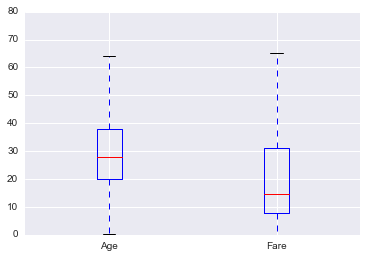

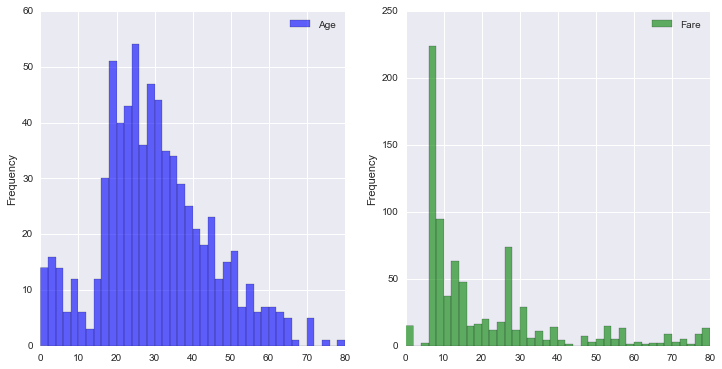

In [9]:
titanic_data[interval_vars].plot(kind='box',ylim=(0,80))
plt.figure()
titanic_data[interval_vars].plot.hist(bins=range(0,82,2),xlim=(0,80),
                                      subplots=True,layout=(1,2),figsize=(12,6),
                                     alpha=0.6)

Both Age and Fare distributions have long tails, with Age close to normal distribution. 
+ Most passengers are between 20 and 40 years old, and there are more children (0-10) than elder people (70-80).
+ Though the maximum fare is 512, most fares fall in the range of [0,100]. 
+ Some fares have price 0, further checking didn't find problem with these entries. The high price (>100) fares all correspond to class 1, which makes sense, too.

In [10]:
titanic_data[(titanic_data['Fare']>100)].sort_values(['Fare','Name'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.00,1,0,106.4250,C
537,538,1,1,"LeRoy, Miss. Bertha",female,30.00,0,0,106.4250,C
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.00,1,0,108.9000,C
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.00,1,0,108.9000,C
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,110.8833,C
698,699,0,1,"Thayer, Mr. John Borland",male,49.00,1,1,110.8833,C
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.00,0,2,110.8833,C
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.00,1,1,110.8833,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,113.2750,C
393,394,1,1,"Newell, Miss. Marjorie",female,23.00,1,0,113.2750,C


### Then look at the categorical data distribution

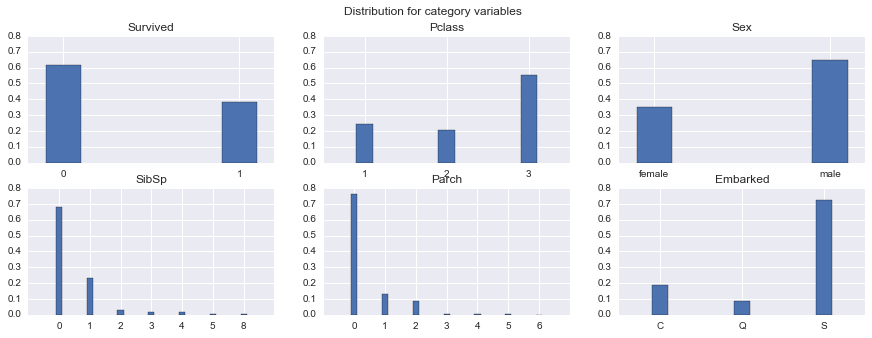

In [11]:
# Bar plots for categorical variables, to see the distribution among them
def bar_plot(col):
    val_cts = titanic_data[col].value_counts(normalize=True,sort=False)
    plt.title(col)
    plt.bar(range(val_cts.shape[0]),val_cts.values,width=0.2,
            tick_label=val_cts.index, align='center')
    ylim(0,0.8)

plt.figure(1, figsize=(15,5))
plt.suptitle("Distribution for category variables",fontsize=12)
i = 1
for name in cat_vars:
    plt.subplot(2,3,i)
    bar_plot(name)
    i = i + 1

In [12]:
titanic_data['Survived'].value_counts()/titanic_data.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

From the bar plots above of the categorical data, I observed the following:
+ Survival rate is 38.38%.
+ Most passengers were in 3rd class.
+ There were more male passengers than female.
+ Most passengers embarked from Southampton.
+ Passengers with more than 1 sibling/spouse or 2 parents/children on board were relatively few. It is better to group them into one single group when comparing with passengers with few (0,1,2) relatives on board. Further, most passengers didn't have relative on board with them.

### Next I will explore the data more trying to answer the questions proposed, first the factors contributing to survival.

In [13]:
surv_colors = np.array(["blue","green"])[titanic_data['Survived']]

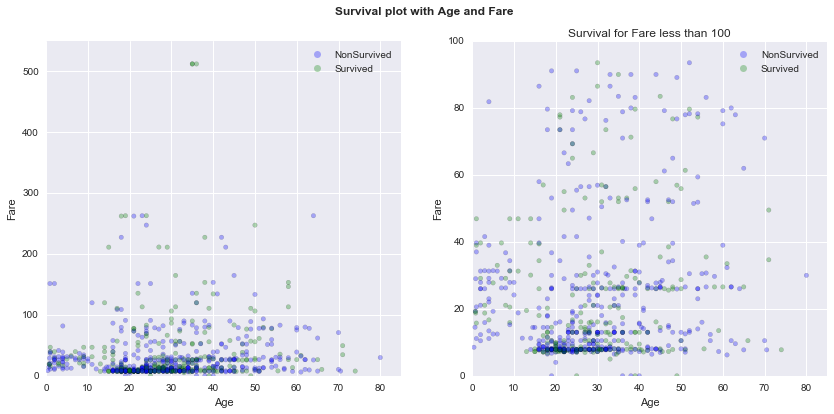

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14,6))
plt.suptitle("Survival plot with Age and Fare",fontsize=12,fontweight="bold")
plt.subplot(121)
plt.scatter(titanic_data['Age'],y=titanic_data['Fare'],c=surv_colors,alpha=0.3)
line1 = plt.Line2D(range(10), range(10), marker='o', color='blue',linestyle="",alpha=0.3)
line2 = plt.Line2D(range(10), range(10), marker='o', color='green',linestyle="",alpha=0.3)
plt.legend((line1,line2),('NonSurvived','Survived',),numpoints=1, loc=1)
plt.ylim(0,550)
plt.xlim(0,85)
plt.xlabel("Age")
plt.ylabel("Fare")

# zoom in with fare less than $100
plt.subplot(122)
plt.scatter(titanic_data['Age'],y=titanic_data['Fare'],c=surv_colors,alpha=0.3)
plt.legend((line1,line2),('NonSurvived','Survived',),numpoints=1, loc=1)
plt.ylim(0,100)
plt.xlim(0,85)
plt.title("Survival for Fare less than 100")
plt.xlabel("Age")
plt.ylabel("Fare")

Since the fare and age are both continuous variables, I chose the scatter plot with color indicating the survival (blue for 0 and green for 1). Since most points are concentrated between age 20 and 40, and fare between 0 and 100, the scatter plot does not convey much. Although it does look like that there are more survivals when the fare is higher than 100, and fewer survivals for children and elderly. Next I will use a histogram plot to see whether it'll illustrate a clearer pattern.

In [15]:
def plot_suvival_interval(col,count_bins,x_labels=""):
    surv_counts = titanic_data[titanic_data.Survived == 1][col].value_counts(bins=count_bins,sort=False)
    nonsurv_counts = titanic_data[titanic_data.Survived == 0][col].value_counts(bins=count_bins,sort=False)
    surv_counts = surv_counts[surv_counts>0]
    nonsurv_counts = nonsurv_counts[nonsurv_counts>0]
    
    surv_df = pd.DataFrame({'Survived': surv_counts, 'NonSurvived':nonsurv_counts})
    surv_df_percent = surv_df.apply(lambda x:x/np.sum(x), axis=1)

    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14,5))
    ax0 = surv_df_percent.plot.bar(stacked=True,legend=False,title='surviving percentage by '+col,
                        ax=ax[0])
    
    ax1 = surv_df.plot.bar(stacked=True,title='surviving counts by '+col,
                 ax=ax[1])
    
    degrees = 45
    label_align = 'right'
    if x_labels == "":
        x_labels = list(surv_df.index)
        degrees = 90
        label_align = 'center'
    ax0.set_xticklabels(x_labels, rotation=degrees, ha=label_align)
    ax1.set_xticklabels(x_labels, rotation=degrees, ha=label_align)
#print surv_df

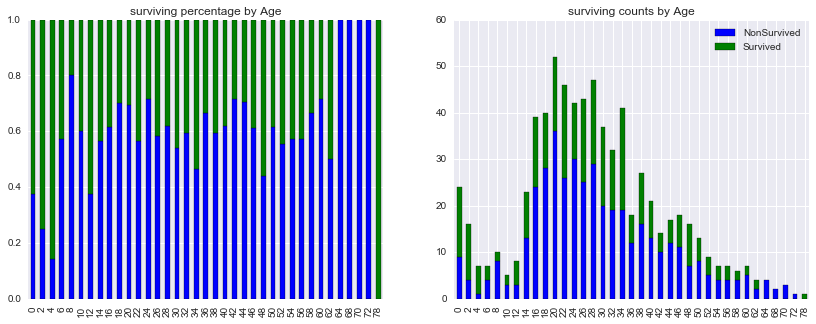

In [16]:
plot_suvival_interval("Age",range(0,83,2),"")

From the histograms above, we can see that the survival percentage is quite uniformly distributed among the ages, except that it's a little higher for the age group 0-5. The age groups 64-80 have either 0 or 100% survival rate, but the number of passengers in these groups is too small to draw any conclusion.


_Because of the ununiform distribution of passengers in different age groups with the same age gap, it's hard to draw conclusion with either the absolute suvival count or the proportion. Next I will split the passengers into bins with approximately equal count of passengers, with quantile points as bin splitting points._

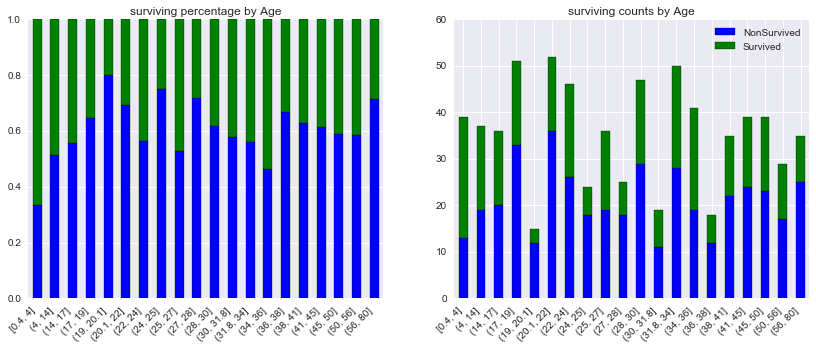

In [17]:
col_d = titanic_data["Age"]
col_out, col_bins = pd.qcut(col_d,q=20,retbins=True,precision=1)
plot_suvival_interval("Age",col_bins,list(col_out.cat.categories))

The observation still holds with this new visualization, but this one is much easier to interpret and makes more sense. Furthermore, with the quantile points as bin borders, there is no need to throw away data beyond the interquartile points. Next I'll do the same plot for the *Fare* column.

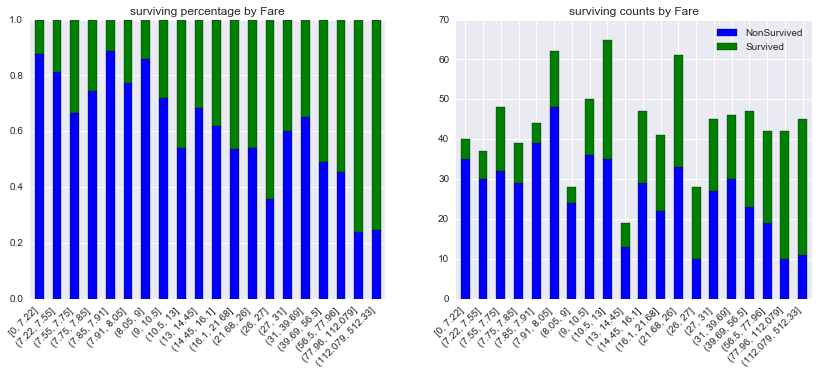

In [18]:
col_d = titanic_data["Fare"]
col_out, col_bins = pd.qcut(col_d,q=20,retbins=True,precision=1)
plot_suvival_interval("Fare",col_bins,list(col_out.cat.categories))

From the above plots, we can see that though the suviving rate is not a strict increasing function of the Fare, the survival rate for Fare in the last two bins (> \$78.0) looks much higher than other bins, and the rate for the first bin (< \$7.2) is much lower.

#### Next I will investigate the categorical variables (columns) of the data and see how they affect the survival rate.

In [19]:
titanic_data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Fare', u'Embarked'],
      dtype='object')

In [20]:
def plot_survival_cat(col,ax):
    grouped = titanic_data[[col,'Survived']].groupby(['Survived',col])
    g_size = grouped.size()

    g_index = g_size.index
    col_levels = g_index.levels[1]
    g_percent = g_size.groupby(level=1).apply(lambda x: x/float(x.sum()))
    #print g_percent
    #print g_percent.unstack().transpose()
    #print g_size.unstack()
    g_percent.unstack().transpose().plot.bar(stacked=True,ax=ax)
    #g_size.unstack().transpose().plot.bar(stacked=True)
    return g_size.unstack().transpose()

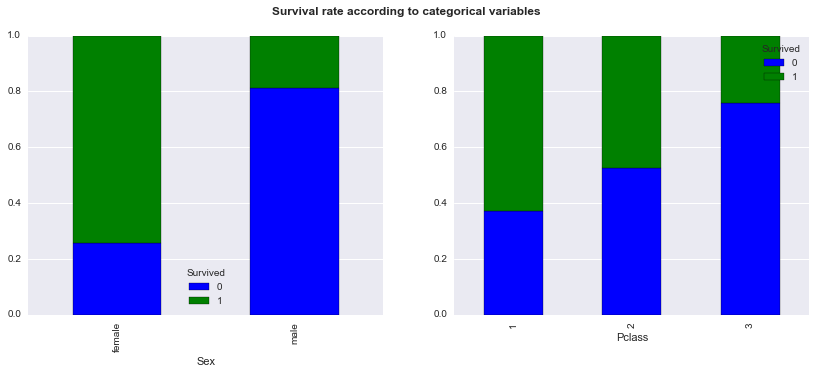

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14,5))
summary_sex = plot_survival_cat('Sex',ax=ax[0])
summary_pclass = plot_survival_cat('Pclass',ax=ax[1])
plt.suptitle("Survival rate according to categorical variables",fontsize=12,fontweight="bold")

In [22]:
print summary_pclass
print summary_sex

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Survived    0    1
Sex               
female     81  233
male      468  109


In [23]:
# chi square test of independence on 2x2 contingency table to see if the survival rates
# are balanced between female and male passengers
from scipy import stats

chi2_stat, pval, dof, expt_freq = stats.chi2_contingency(summary_sex)
print "p value for Sex variable: ", pval

# Same test for Pclass
chi2_stat, pval, dof, expt_freq = stats.chi2_contingency(summary_pclass)
print "p value for Pclass variable ", pval

p value for Sex variable:  1.19735706278e-58
p value for Pclass variable  4.5492517113e-23


From the p value of the test, the probability of observing this or even more imbalanced ratio is 1.2e-58, which is very small. Therefore we conclude that the survival rate is much higher for female than male passengers. Similarly, there is strong correlation between the class and the survival rate, too.

#### In conclusion, both Sex and Pclass have big effect on the passengers' survival. Female passengers had higher survival rate than male passengers, and passengers in better class had higher survival rate. The correlation between age and survival is not obvious from the visualization. Passengers who paid higher fare seemed to have higher survival rate.

References:
+ numpy references
+ pandas references
+ scipy references
+ stackflow